In [79]:
from contextlib import contextmanager
from csv import writer

import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [80]:
engdf = pd.read_csv("engine.csv")


In [81]:
engdf.head()
engdf.ENGINE

0       Mercedes F1 M14 E Performance
1       Mercedes F1 M12 E Performance
2       Mercedes F1 M12 E Performance
3       Mercedes F1 M12 E Performance
4       Mercedes F1 M12 E Performance
                    ...              
4303                              NaN
4304    Mercedes F1 M13 E Performance
4305    Mercedes F1 M13 E Performance
4306    Mercedes F1 M14 E Performance
4307    Mercedes F1 M14 E Performance
Name: ENGINE, Length: 4308, dtype: object

In [82]:
def engine_simple(val):
    val = str(val)
    engine_simple = val.split()
    val = engine_simple[0]
    return val

engdf.ENGINE = engdf.ENGINE.apply(engine_simple)
engdf.ENGINE

def redbull_checker(val):
    if val == "Honda" or val == "TAG" or val == "Red":
        val = "RB"
    return val






In [83]:
engdf.ENGINE = engdf.ENGINE.apply(redbull_checker)

engdf.ENGINE.unique()


engine_dummies = pd.get_dummies(engdf.ENGINE)

engdf = pd.concat([engdf, engine_dummies], axis=1)

engdf.drop(columns=['CAR'])

#print(engdf2)

,Unnamed: 0,SEQ,YEAR,EVENT,DRIVER,ENGINE,GRID POS,RACE,Team Name,Ferrari,Mercedes,RB,Renault,nan
0,0,601,2023,Las Vegas Grand Prix,George Russell,Mercedes,3,8,mercedes,False,True,False,False,False
1,1,501,2021,Russian Grand Prix,Valtteri Bottas,Mercedes,16,5,mercedes,False,True,False,False,False
2,2,502,2021,Turkish Grand Prix,Valtteri Bottas,Mercedes,1,1,mercedes,False,True,False,False,False
3,3,503,2021,Turkish Grand Prix,Lewis Hamilton,Mercedes,11,5,mercedes,False,True,False,False,False
4,4,504,2021,United States Grand Prix,Lewis Hamilton,Mercedes,2,2,mercedes,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4303,96,2022,São Paulo Grand Prix,Sebastian Vettel,nan,9,11,aston-martin,False,False,False,False,True
4304,4304,97,2022,Abu Dhabi Grand Prix,Lance Stroll,Mercedes,14,8,aston-martin,False,True,False,False,False
4305,4305,98,2022,Abu Dhabi Grand Prix,Sebastian Vettel,Mercedes,9,10,aston-martin,False,True,False,False,False
4306,4306,99,2023,Bahrain Grand Prix,Fernando Alonso,Mercedes,5,3,aston-martin,False,True,False,False,False


In [84]:
print(engdf["Team Name"].unique())
print(engdf["YEAR"].unique())


engdf['Team Name'] = engdf['Team Name'].replace('bwt-racing-point-f1-team', 'aston-martin')
engdf['Team Name'] = engdf['Team Name'].replace('force-india', 'aston-martin')

engdf['Team Name'] = engdf['Team Name'].replace('lotus-f1', 'alpine')
engdf['Team Name'] = engdf['Team Name'].replace(['sauber'], 'alfa-romeo')
#group data by product and display sales as line chart

print(engdf["Team Name"].unique())





['mercedes' 'red-bull-racing' 'williams' 'ferrari-2' 'mclaren'
 'force-india' 'lotus-f1' 'marussia' 'sauber' 'caterham' 'haas'
 'bwt-racing-point-f1-team' 'alfa-romeo' 'scuderia-alphatauri-honda'
 'alpine' 'aston-martin']
[2023 2021 2022 2019 2020 2016 2017 2018 2014 2015]
['mercedes' 'red-bull-racing' 'williams' 'ferrari-2' 'mclaren'
 'aston-martin' 'alpine' 'marussia' 'alfa-romeo' 'caterham' 'haas'
 'scuderia-alphatauri-honda']


In [86]:
print(engdf.columns)

Index(['Unnamed: 0', 'SEQ', 'Year', 'EVENT', 'DRIVER', 'CAR', 'ENGINE',
       'GRID POS', 'RACE', 'Team Name', 'Ferrari', 'Mercedes', 'RB', 'Renault',
       'nan'],
      dtype='object')


In [85]:
points = pd.read_csv("final.csv")

engdf = engdf.rename(columns={"YEAR": "Year"})


#points['Year'].astype('int')
points['Team'] = points['Team'].replace('bwt-racing-point-f1-team', 'aston-martin')
points['Team'] = points['Team'].replace('force-india', 'aston-martin')

points['Team'] = points['Team'].replace('lotus-f1', 'alpine')
points['Team'] = points['Team'].replace(['sauber'], 'alfa-romeo')

##print(points)
engdf = engdf.merge(points[['W', 'PD','PTS','WC']], on=['Year','Team'], how='left')

points.set_index('Year', inplace=True)
##print(points)




KeyError: 'Year'

      Unnamed: 0          Team  ST  W  PD  PP  FL  BF  BG    PTS   WC  \
Year                                                                    
2021           8  aston-martin  22  0   1   0   0   2   5   77.0  7th   
2022           9  aston-martin  22  0   0   0   0   6   5   55.0  7th   
2023          10  aston-martin  20  0   8   0   1   2   2  261.0  5th   
2019          11  aston-martin  21  0   0   0   0   4   5   73.0  7th   
2020          12  aston-martin  17  1   4   1   0   1   1  195.0  4th   
2014          24  aston-martin  19  0   1   0   1   3   4  155.0  6th   
2015          25  aston-martin  19  0   1   0   0   3   4  136.0  5th   
2016          26  aston-martin  21  0   2   0   1   3   2  173.0  4th   
2017          27  aston-martin  20  0   0   0   1   4   3  187.0  4th   
2018          28  aston-martin  12  0   1   0   0   3   6   52.0  7th   

                     CAR                         ENGINE  
Year                                                     
2021  A

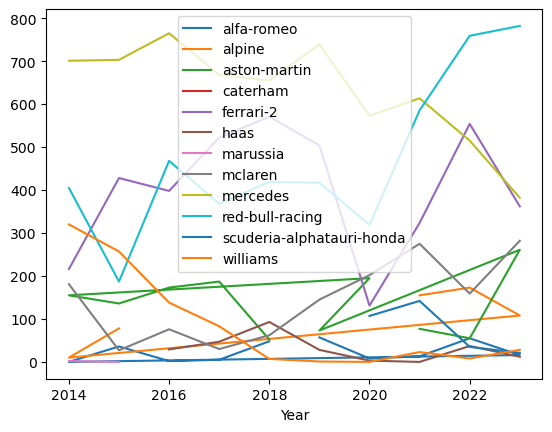

In [ ]:
points.groupby('Team')['PTS'].plot(legend=True)

#group data by product and display sales as line chart
print(points[points['Team']=='aston-martin'])